In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

import time
import matplotlib.pyplot as plt
import numpy as np



/home/valentin/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

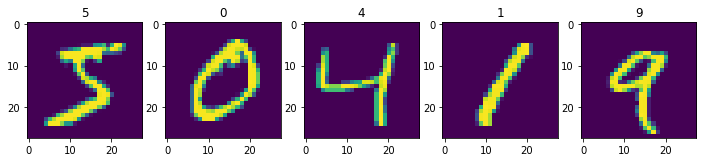

In [5]:

plt.figure(figsize=(12,8))
for i in range(5):
    ax = plt.subplot(1,5,i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.set_title(y_train[i])
    
plt.show()

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
def model_1():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

In [8]:
m = model_1()
m

In [9]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras_sequential_ascii import sequential_model_to_ascii_printout

sequential_model_to_ascii_printout(m)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         784
               Dense   XXXXX -------------------    200960    85.5%
                relu   #####         256
               Dense   XXXXX -------------------     32896    14.0%
                relu   #####         128
             Dropout    | || -------------------         0     0.0%
                       #####         128
               Dense   XXXXX -------------------      1290     0.5%
             softmax   #####          10


In [11]:
from keras.callbacks import TensorBoard

batch_size = 256
epochs = 10

history = m.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/mnist')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3780 - acc: 0.8909 - val_loss: 0.1628 - val_acc: 0.9497
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1404 - acc: 0.9584 - val_loss: 0.1088 - val_acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0963 - acc: 0.9713 - val_loss: 0.0839 - val_acc: 0.9734
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0714 - acc: 0.9787 - val_loss: 0.0759 - val_acc: 0.9757
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0567 - acc: 0.9822 - val_loss: 0.0676 - val_acc: 0.9785
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0440 - acc: 0.9870 - val_loss: 0.0614 - val_acc: 0.9803
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0363 - acc: 0.9892 - val_loss: 0.0638 - val_acc

In [12]:
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06486032230899146
Test accuracy: 0.9816


In [13]:
img_num = np.random.randint(x_test.shape[0])
img_num

630

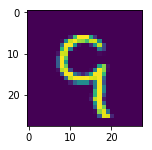

In [14]:
plt.figure(figsize=(12,8))

ax = plt.subplot(1,5,i+1)

sample = x_test[img_num]

plt.imshow(sample.reshape(28, 28))
    
plt.show()

In [15]:
x_test[img_num:img_num+10].shape


(10, 784)

In [16]:
predictions = m.predict_proba(x_test)
predictions

array([[2.97006864e-08, 5.01570128e-07, 1.75393916e-06, ...,
        9.99975681e-01, 6.11890982e-09, 1.57279288e-07],
       [2.29914048e-12, 1.81008472e-05, 9.99981880e-01, ...,
        1.20919286e-09, 4.52786114e-10, 1.60774339e-15],
       [4.08270466e-08, 9.99958754e-01, 5.15533827e-07, ...,
        1.98424768e-05, 3.19966921e-06, 4.26666631e-08],
       ...,
       [1.29119718e-12, 4.02474234e-11, 6.90479791e-13, ...,
        1.26960185e-08, 2.76321188e-09, 1.12018779e-06],
       [1.57784827e-11, 3.00036385e-11, 3.69990410e-12, ...,
        4.46582528e-11, 2.29075749e-06, 2.47338233e-10],
       [3.24572799e-11, 4.37010237e-12, 6.59937049e-15, ...,
        1.20515345e-16, 1.08498537e-10, 3.43676650e-12]], dtype=float32)

In [17]:
predictions[img_num]

array([1.6295751e-07, 1.9429896e-08, 8.7892342e-09, 4.9797751e-07,
       1.4712700e-06, 5.2680826e-04, 6.0842730e-08, 1.6597335e-06,
       2.8409104e-05, 9.9944097e-01], dtype=float32)

In [18]:
np.around(predictions[img_num], decimals=3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
       0.999], dtype=float32)

In [19]:
predictions = m.predict(x_test)

In [20]:
np.argmax(predictions[img_num])


9

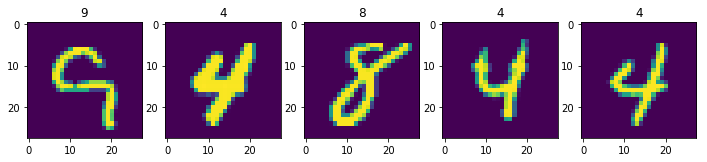

In [21]:

plt.figure(figsize=(12,8))
for i in range(5):
    index = np.random.randint(x_test.shape[0])
    ax = plt.subplot(1,5,i+1)
    plt.imshow(x_test[index].reshape(28, 28))
    ax.set_title(np.argmax(predictions[index]))
    
    
plt.show()

In [22]:
m


In [23]:
#m.save('mnist_v1.h5')

In [26]:
!ls -lh

total 2,9M
-rw-r--r-- 1 valentin valentin 2,2K Dec  6 16:09 backup_ecm.txt
-rw-r--r-- 1 valentin valentin  91K Feb 10 17:04 CIFAR.ipynb
-rw-r--r-- 1 valentin valentin  416 Nov 29 11:16 c++_test.ipynb
drwxr-xr-x 2 valentin valentin 4,0K Jan 30 14:40 data
-rw-r--r-- 1 valentin valentin  436 Dec 11 10:22 json_rpc.py
-rw-r--r-- 1 valentin valentin  36K Feb 10 17:10 Mnist.ipynb
-rw-r--r-- 1 valentin valentin 2,8M Feb 10 17:10 mnist_v1.h5
drwxr-xr-x 7 valentin valentin 4,0K Jan 30 14:39 models
-rwxr-xr-x 1 valentin valentin 1,8K Dec 11 14:37 occonnectors_jsonrpc_client.py
-rw-r--r-- 1 valentin valentin  528 Dec 11 16:45 out.plist
-rw-r--r-- 1 valentin valentin 9,0K Feb 10 13:58 tensorflow_test.ipynb
-rwxr-xr-x 1 valentin valentin  164 Dec 11 14:39 test_2.py
-rwxr-xr-x 1 valentin valentin 1,7K Dec 11 13:35 test.py


In [24]:
#del m

In [26]:
import seaborn as sns
sns.set()

def train(model, batch_size, epochs):
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test),
                        callbacks=[TensorBoard(log_dir='/tmp/mnist')])
    return history

def my_eval(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    plt.figure(0)
    plt.plot(history.history['acc'],'r')
    plt.plot(history.history['val_acc'],'g')
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])

    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])

    plt.show()

def nn(model, batch_size=128, epochs=20, save=None):
    
    model.summary()
    sequential_model_to_ascii_printout(model)
    
    history = train(model, batch_size, epochs)
    
    my_eval(model, history)
    
    if(save != None):
        model.save(save)
    
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         784
               Dense   XXXXX -------------------    200960    98.7%
                relu   #####         256
             Dropout    | || -------------------         0     0.0%
                       #####         256
               Dense   XXXXX -------------------      2570     1.3%

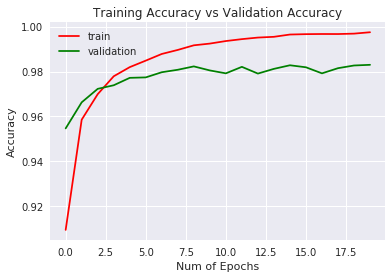

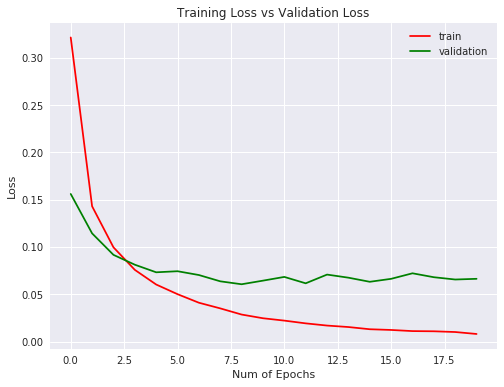

In [27]:

def model_2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

model = nn(model_2())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         784
               Dense   XXXXX -------------------      7850   100.0%
             softmax   #####          10
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.6763 - acc: 0.8321 - val_loss: 0.3833 - val_acc: 0.9013
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3622 - acc: 0.9024 - val_loss: 0.3188 - val_acc: 0.9134
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3198 - acc: 0.9113 - val_loss: 0.2970 -

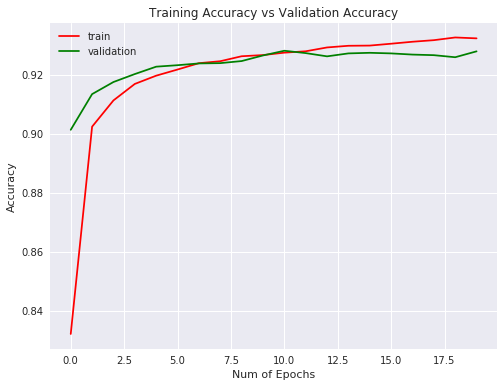

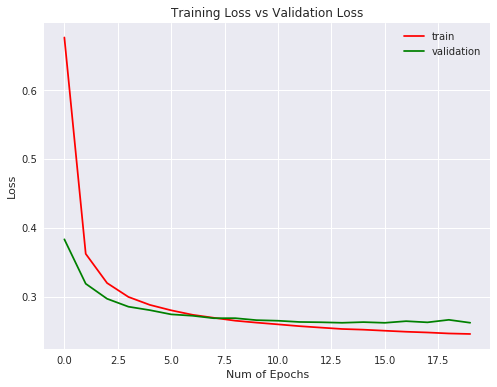

In [29]:
def model_3():
    model = Sequential()
    model.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

model = nn(model_3())

In [44]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [51]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

def model_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32,(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64,(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
__________

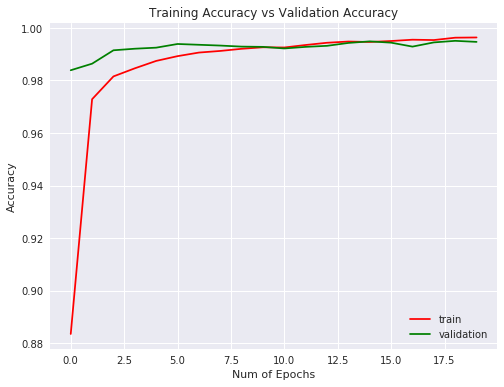

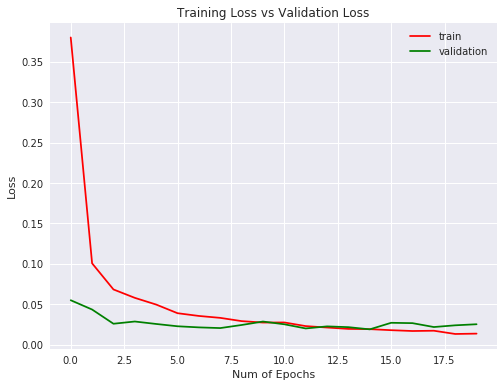

In [52]:

model_cnn = nn(model_cnn())

In [53]:
model_cnn.save('mnist_cnn.h5')

In [54]:
!ls -lh

total 22M
-rw-r--r-- 1 valentin valentin 2,2K Dec  6 16:09 backup_ecm.txt
-rw-r--r-- 1 valentin valentin 1,1M Feb 11 18:15 CIFAR_feed_forward.ipynb
-rw-r--r-- 1 valentin valentin 3,5M Feb 10 18:22 cifar_v1_1000ep.h5
-rw-r--r-- 1 valentin valentin 3,5M Feb 10 23:24 cifar_v1_100ep.h5
-rw-r--r-- 1 valentin valentin 2,0M Feb 11 16:27 cifar_v2.h5
-rw-r--r-- 1 valentin valentin 2,1M Feb 11 16:29 cifar_v3.h5
-rw-r--r-- 1 valentin valentin 2,0M Feb 11 16:33 cifar_v4.h5
-rw-r--r-- 1 valentin valentin 2,0M Feb 11 16:35 cifar_v5.h5
-rw-r--r-- 1 valentin valentin  416 Nov 29 11:16 c++_test.ipynb
drwxr-xr-x 2 valentin valentin 4,0K Jan 30 14:40 data
-rw-r--r-- 1 valentin valentin  436 Dec 11 10:22 json_rpc.py
-rw-r--r-- 1 valentin valentin 3,3M Feb 11 19:51 mnist_cnn.h5
-rw-r--r-- 1 valentin valentin 235K Feb 11 19:50 Mnist.ipynb
-rw-r--r-- 1 valentin valentin 2,8M Feb 10 17:10 mnist_v1.h5
drwxr-xr-x 7 valentin valentin 4,0K Jan 30 14:39 models
-rwxr-xr-x 1 valentin valentin 1,8K Dec 11 14:37 occon

In [55]:
predictions_cnn = model_cnn.predict(x_test)

In [57]:
predictions_cnn.shape

(10000, 10)

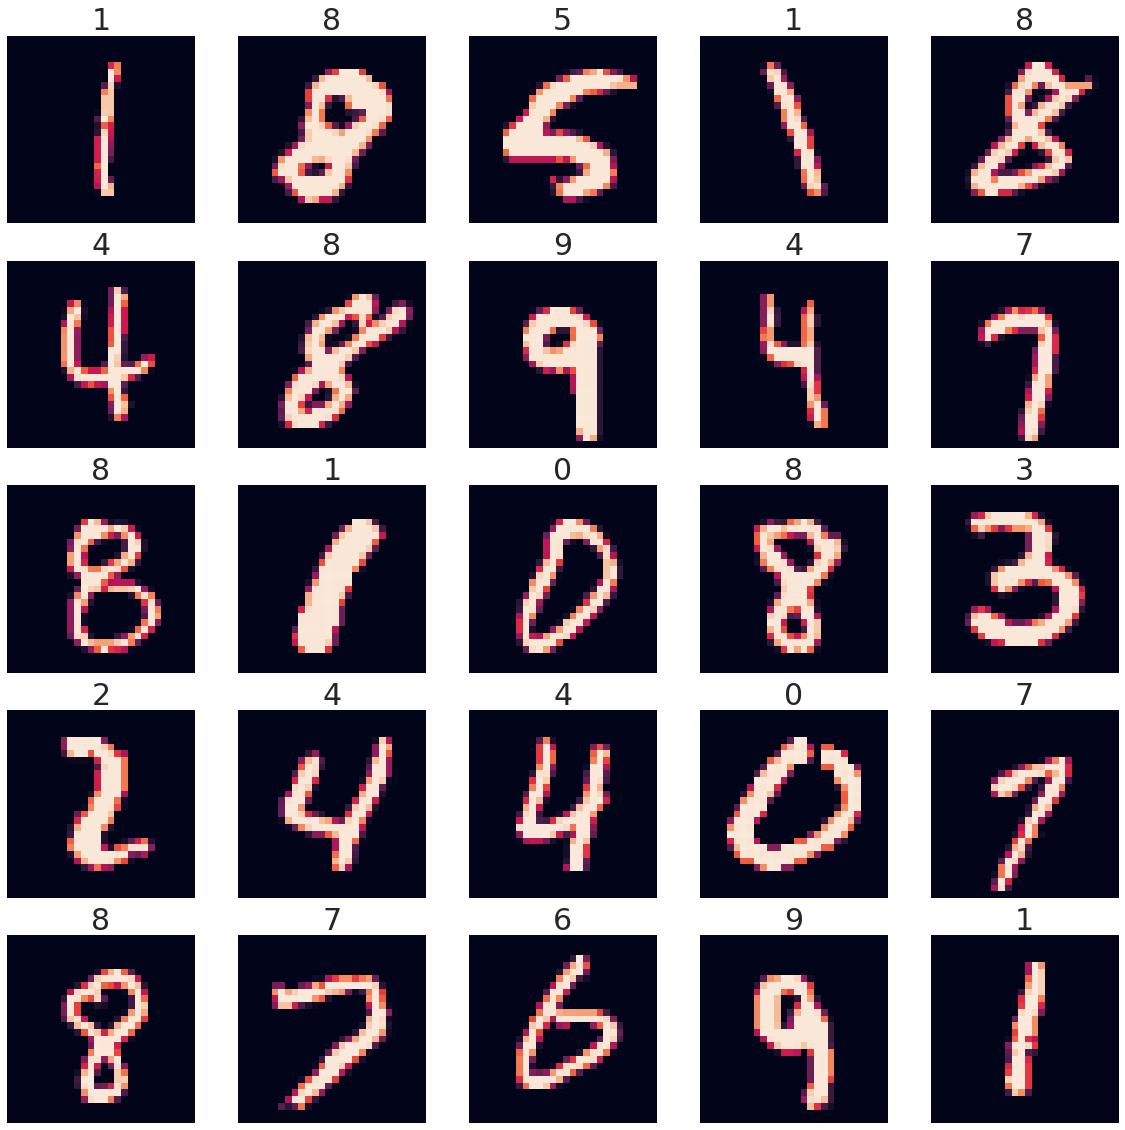

In [68]:
plt.figure(figsize=(20,20))
for i in range(25):
    index = np.random.randint(x_test.shape[0])
    ax = plt.subplot(5,5,i+1, xticks=[], yticks=[])
    plt.imshow(x_test[index].reshape(28, 28))
    ax.set_title(np.argmax(predictions_cnn[index]))
    ax.title.set_fontsize(30)
    
plt.show()